In [ ]:
# Importing the necessary packages
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = '/content/drive/MyDrive/256.zip'
zip_ref = zipfile.ZipFile(data, 'r')
zip_ref.extractall('/content/data/')
zip_ref.close()

In [ ]:
img_width, img_height = 255, 255
batch_size = 16

# Training generator
train_data_dir = '/content/data/training/'
train_datagen = ImageDataGenerator(
    rescale = 1./255
)

# Validation generator
validation_data_dir = '/content/data/validation/'
validation_datagen = ImageDataGenerator(
    rescale = 1./255
)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'grayscale')

validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    color_mode = 'grayscale')

Found 4000 images belonging to 4 classes.
Found 800 images belonging to 4 classes.


In [ ]:
# Model Parameters
lrParam = 0.00032
dParam = 0.3

In [ ]:
# Defining the model
model = tf.keras.models.Sequential([
        
        tf.keras.layers.Conv2D(filters=8, input_shape=(img_width, img_height, 1), kernel_size=(3,3),
                               kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(3,3)),

        tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3),
                               kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(3,3)),

        tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), 
                               kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
        tf.keras.layers.Activation('relu'),
        tf.keras.layers.AveragePooling2D(pool_size=(3,3)),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(500, activation = 'sigmoid',
                              kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
        tf.keras.layers.Dropout(dParam),

        tf.keras.layers.Dense(204, activation = 'sigmoid',
                              kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
        tf.keras.layers.Activation('sigmoid'),
        tf.keras.layers.Dropout(dParam),

        tf.keras.layers.Dense(4, activation = 'softmax',
                              kernel_regularizer = tf.keras.regularizers.l2(lrParam)),
])

model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 253, 253, 8)       80        
_________________________________________________________________
activation (Activation)      (None, 253, 253, 8)       0         
_________________________________________________________________
average_pooling2d (AveragePo (None, 84, 84, 8)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 82, 82, 16)        1168      
_________________________________________________________________
activation_1 (Activation)    (None, 82, 82, 16)        0         
_________________________________________________________________
average_pooling2d_1 (Average (None, 27, 27, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 25, 25, 32)        4

In [ ]:
# Training the model
hist = model.fit_generator(train_generator,
                           steps_per_epoch = 4000 // batch_size,
                           validation_steps = 800 // batch_size,
                           epochs = 40,
                           validation_data = validation_generator,
                           verbose = 1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
250/250 [==============================] - 39s 29ms/step - loss: 1.3078 - accuracy: 0.4893 - val_loss: 0.9735 - val_accuracy: 0.7200
Epoch 2/40
250/250 [==============================] - 7s 29ms/step - loss: 0.9294 - accuracy: 0.7450 - val_loss: 0.7532 - val_accuracy: 0.8213
Epoch 3/40
250/250 [==============================] - 7s 29ms/step - loss: 0.7516 - accuracy: 0.8347 - val_loss: 0.5795 - val_accuracy: 0.9038
Epoch 4/40
250/250 [==============================] - 7s 29ms/step - loss: 0.6806 - accuracy: 0.8555 - val_loss: 0.5472 - val_accuracy: 0.9000
Epoch 5/40
250/250 [==============================] - 7s 28ms/step - loss: 0.6294 - accuracy: 0.8733 - val_loss: 0.4937 - val_accuracy: 0.9262
Epoch 6/40
250/250 [==============================] - 7s 29ms/step - loss: 0.5959 - accuracy: 0.8838 - val_loss: 0.4993 - val_accuracy: 0.9125
Epoch 7/40
250/250 [==============================] - 7s 28ms/step - loss: 0.5757 - accuracy: 0.8873 - val_loss: 0.4849 - val_accuracy: 0.917

In [ ]:
# Saving the model
model.save('/content/drive/MyDrive/model.h5')

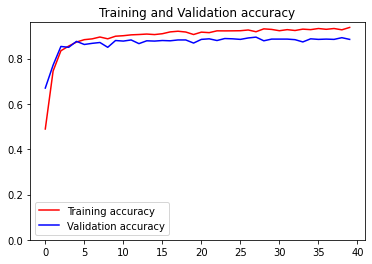

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plotting graphs for the model metrics
import matplotlib.pyplot as plt
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
val_acc = [x-0.05 for x in val_acc]

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.ylim(ymin=0)
plt.title('Training and Validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

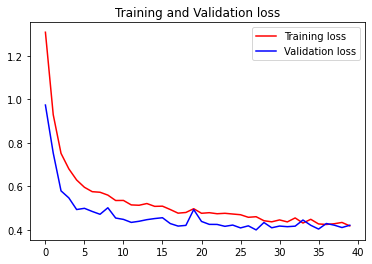

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

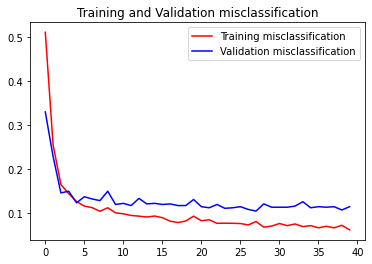

<Figure size 432x288 with 0 Axes>

In [ ]:
misc = [1 - x for x in hist.history['accuracy']]
val_misc = [1 - x for x in val_acc]

epochs = range(len(acc))

plt.plot(epochs, misc, 'r', label='Training misclassification')
plt.plot(epochs, val_misc, 'b', label='Validation misclassification')
plt.title('Training and Validation misclassification')
plt.legend(loc=0)
plt.figure()
plt.show()